### Importación de datos



In [6]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [7]:
tienda["Precio"] = tienda["Precio"].round(0).astype(int)
tienda2["Precio"] = tienda2["Precio"].round(0).astype(int)
tienda3["Precio"] = tienda3["Precio"].round(0).astype(int)
tienda4["Precio"] = tienda4["Precio"].round(0).astype(int)

sumaVentas = tienda["Precio"].sum()
print(f"La suma de las ventas de la primera tienda fué: ${sumaVentas} pesos")
sumaVentas2 = tienda2["Precio"].sum()
print(f"La suma de las ventas de la segunda tienda fué: ${sumaVentas2} pesos")
sumaVentas3 = tienda3["Precio"].sum()
print(f"La suma de las ventas totales de la tercera tienda fué: ${sumaVentas3} pesos")
sumaVentas4 = tienda4["Precio"].sum()
print(f"La suma de las ventas totales de la tercera tienda fué: ${sumaVentas4} pesos")
ventasTotales = sumaVentas + sumaVentas2 + sumaVentas3 + sumaVentas4
print(f"El total de las ventas conjuntas de las 4 tiendas fué: ${ventasTotales} pesos")

print("Se puede observar en el siguiente grafico las ventas totales de cada tienda: ")


La suma de las ventas de la primera tienda fué: $1150880400 pesos
La suma de las ventas de la segunda tienda fué: $1116343500 pesos
La suma de las ventas totales de la tercera tienda fué: $1098019600 pesos
La suma de las ventas totales de la tercera tienda fué: $1038375700 pesos
El total de las ventas conjuntas de las 4 tiendas fué: $4403619200 pesos
Se puede observar en el siguiente grafico las ventas totales de cada tienda: 


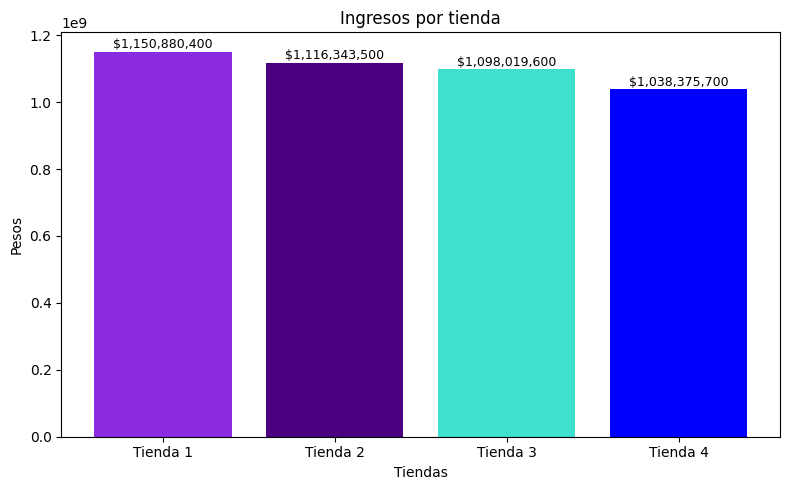

In [8]:
import matplotlib.pyplot as plt
ingresos = [sumaVentas,
    sumaVentas2,
    sumaVentas3,
    sumaVentas4,
]

tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['#8A2BE2', '#4B0082', '#40E0D0', '#0000FF']

plt.figure(figsize=(8, 5))
barras = plt.bar(tiendas, ingresos, color=colores)

plt.title('Ingresos por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Pesos')

for i, ingreso in enumerate(ingresos):
    plt.text(i, ingreso + ingreso * 0.01, f"${int(ingreso):,}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [19]:
tiendas = [tienda, tienda2, tienda3, tienda4]
tienda_nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

for nombre_tienda, tienda in zip(tienda_nombres, tiendas):
    print(f"\n{nombre_tienda}:\n")

    ventasCategoria = tienda.groupby('Categoría del Producto').agg(
        Cantidad_Ventas=('Precio', 'count'),
        Recaudado_Total=('Precio', 'sum')
    ).reset_index().sort_values(by='Cantidad_Ventas', ascending=False)
    print(ventasCategoria)



Tienda 1:

    Categoría del Producto  Cantidad_Ventas  Recaudado_Total
7                  Muebles              480        192528900
3             Electrónicos              451        409476100
5                 Juguetes              338         20262200
1     Deportes y diversión              277         33350100
2        Electrodomésticos              254        283260200
0  Artículos para el hogar              201         15074500
6                   Libros              187          9321300
4   Instrumentos musicales              170         75102400

Tienda 2:

    Categoría del Producto  Cantidad_Ventas  Recaudado_Total
7                  Muebles              442        176426300
3             Electrónicos              422        410831100
5                 Juguetes              313         15945400
2        Electrodomésticos              305        348567800
1     Deportes y diversión              275         34744500
4   Instrumentos musicales              224        104990300


# 3. Calificación promedio de la tienda


In [ ]:
valoracionPromedioT1 = round(tienda["Calificación"].mean(), 2)
valoracionPromedioT2 = round(tienda2["Calificación"].mean(), 2)
valoracionPromedioT3 = round(tienda3["Calificación"].mean(), 2)
valoracionPromedioT4 = round(tienda4["Calificación"].mean(), 2)


In [ ]:
print(f'la calificacion promedio de la tienda 1 es: {valoracionPromedioT1}')
print(f'la calificacion promedio de la tienda 2 es: {valoracionPromedioT2}')
print(f'la calificacion promedio de la tienda 3 es: {valoracionPromedioT3}')
print(f'la calificacion promedio de la tienda 4 es: {valoracionPromedioT4}')


la calificacion promedio de la tienda 1 es: 4.0
la calificacion promedio de la tienda 2 es: 4.04
la calificacion promedio de la tienda 3 es: 4.05
la calificacion promedio de la tienda 4 es: 4.0


# 4. Productos más y menos vendidos

In [16]:
def mostrar_ventas_y_recaudacion(nombre_tienda, df):

    ventas = df["Producto"].value_counts()


    recaudacion = df.groupby("Producto")["Precio"].sum()

    resumen = pd.DataFrame({
        "CantidadVendida": ventas,
        "RecaudacionTotal": recaudacion
    }).sort_values("CantidadVendida", ascending=False)

    resumen.index = resumen.index.astype(str)


    top_5 = resumen.head(5)
    bottom_5 = resumen.tail(5)

    print(f"\n{nombre_tienda.upper()}")
    print("\nTop 5 productos más vendidos:")
    print(top_5)
    print("\nTop 5 productos menos vendidos:")
    print(bottom_5)


In [17]:
mostrar_ventas_y_recaudacion("Tienda 1", tienda)
mostrar_ventas_y_recaudacion("Tienda 2", tienda2)
mostrar_ventas_y_recaudacion("Tienda 3", tienda3)
mostrar_ventas_y_recaudacion("Tienda 4", tienda4)



TIENDA 1

Top 5 productos más vendidos:
                           CantidadVendida  RecaudacionTotal
Producto                                                    
Cama box                                62          32946300
Cubertería                              59           2649300
Cama king                               56          37555400
Dashboards con Power BI                 56           1990600
Carrito de control remoto               55           4014200

Top 5 productos menos vendidos:
                             CantidadVendida  RecaudacionTotal
Producto                                                      
Ciencia de datos con Python               38           2108800
Refrigerador                              38          75271900
Guitarra acústica                         37          11257100
Armario                                   34          16421400
Guitarra eléctrica                        33          25823100

TIENDA 2

Top 5 productos más vendidos:
                 

# 5. Envío promedio por tienda

In [31]:
def costo_envio_promedio(nombre_tienda, df):
    promedio = df["Costo de envío"].mean()
    print(f"Costo de envío promedio en {nombre_tienda}: ${promedio:.2f}")
costo_envio_promedio("Tienda 1", tienda)
costo_envio_promedio("Tienda 2", tienda2)
costo_envio_promedio("Tienda 3", tienda3)
costo_envio_promedio("Tienda 4", tienda4)

Costo de envío promedio en Tienda 1: $23459.46
Costo de envío promedio en Tienda 2: $25216.24
Costo de envío promedio en Tienda 3: $24805.68
Costo de envío promedio en Tienda 4: $23459.46


# Reporte
## Sugerencia de venta: tienda 4
### En la primera seccion sobre facturacion, la tienda 4 queda en desventaja con las otras tres tiendas presentando valores de facturacion mas bajos.
Aunque  tiene un costo de envio medio en comparacion a las 3 tiendas, esto no ha representado una ventaja contra aquellas que tienen costo de envio mas bajos.